# Principal Component Analysis (PCA)

### What is PCA?

> ** It is a dimensionality reduction technique ** 

> It identifies a smaller number of uncorrelated variables, called "principal components", from a dataset consisiting of a lot of features. The goal of principal component analysis is to explain the maximum amount of variance with the fewest number of principal components or features.

### What is the abstract concept underlying PCA?

It is an unsupervised linear transformation technique i.e. the feature reduction is independent of the class labels.

It aims to find the directions of maximum variance in a high dimensional data based on the co-relation between different features. Once it determines the directions, then it projects the features into a different 'space' using transformation

### Fancy some dirty details? Let's delve into the secret mathematical sauce for PCA

_Note: Feel free to skip this section if you are only interested in the practical implementation of it. However, it's worth mentioning that understanding the maths helps you immensely in the long run_

The story of PCA originates from the math of eigenvectors and eigenvalues. 

For a quick recap, an eigenvector or characteristic vector of a linear transformation is a non-zero vector that does not change its direction when that linear transformation is applied to it.
[ [Wikipedia]("https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors") ]

$Av = \lambda v$

In this case, A is the linear transformation, which when applied to vector v results in the change of magnitude of vector v but not the direction. Here v is the eigenvector and $\lambda$ is a scalar representing the eigenvalue

Back to **How?**

+ To understand how different features vary together, we use co-variance matrix

  Co-variance between two features $x_{j}$ and $x_{k}$ is given by the following formula:
  
  $$\sigma_{jk} = \frac{1}{n}\sum_{i=1}^{n}\left( x_{ij}-{u}_j \right) \left( x_{ik}-{u}_k \right).$$
  
  where $u_{j}$ and $u_{k}$ represents the mean of feature vectors $x_{j}$ and $x_{k}$
  
  In case of a dataset with 3 features, the co-variance between different features can be represented in the following way:
    $$
    \sigma  =   \begin{bmatrix}
        \sigma_{11} & \sigma_{12} & \sigma_{13}\\
        \sigma_{21} & \sigma_{22} & \sigma_{23}\\
        \sigma_{31} & \sigma_{32} & \sigma_{33}\\
    \end{bmatrix} 
    $$
  
  An example to explain what this matrix represents:
  ![Co-variance](covariance.png) 
  
  In order to understand the geometrical interpretation of the co-variance matrix, please refer to this [article]("http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/")
  
  
+ Now if we observe this co-variance matrix, then its symmetric is nature in nature, which implies
    * The matrix will have only real eigenvalues and non-zero eigen vetors
    * They will be orthogonal to each other


+ Let the eigen values of this matrix (which also represents the Principal components of PCA) be $\lambda_{1}$, $\lambda_{2}$,....,$\lambda_{m}$. Now the trace of a matrix, which represents the sum of diagonal elements, is also equal to the sum of the eigen values [[Reference](http://www.math.union.edu/~jaureguj/PCA.pdf)]

    Back to our example of 3 dimensional co-variance matrix

    $$
    \sigma  =   \begin{bmatrix}
        \sigma_{11} & \sigma_{12} & \sigma_{13}\\
        \sigma_{21} & \sigma_{22} & \sigma_{23}\\
        \sigma_{31} & \sigma_{32} & \sigma_{33}\\
    \end{bmatrix} 
    $$
    
    Applying the trace concept here,
    
    $\lambda_{1}+ \lambda_{2} + \lambda_{3} =  \sigma_{11} + \sigma_{22} + \sigma_{33} $

    Due to this, eigenvalues captures the total variance of features. This also points to another important conclusion,
    
    **PCA can't capture variance beyond those present in features. So we you can't magically increase you R<sup>2</sup> if your features are weak.**


+ $\lambda_{1}$ which represents the first principal component, explains the maximum variance, followed by $\lambda_{2}$ and so on.


+ A curious chap might have the following questions in mind:
    * _Why the eigenvalues of a co-variance matrix represents the principal components ?_
    * _Why the first components represents the maximum variance._
    
   I would recommend that curious chap to read this [lecture](http://www.stat.cmu.edu/~cshalizi/350/lectures/10/lecture-10.pdf)
   
<em> I guess this is enough math for now; let's try to understand PCA through an example</em>

### Interpretation of PCA

![PCA Interpretation](pca.png)
[[Reference](http://www.math.union.edu/~jaureguj/PCA.pdf)]

### Implementation using scikit - learn

In [24]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

We are using the wine dataset to understand the implementation of PCA
Link of dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

In [6]:
df_wine = pd.read_csv('wine.data',header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


** Now, PCA is sensitive to scaling, so we have to make sure that we scale the data before we apply PCA to it. **

In [11]:
sc = StandardScaler()
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_scaled = sc.fit_transform(X)

In [8]:
pca = PCA(n_components=None)
#n_components is used to specify the number of principal components that we are looking for.
#We have specified it to None since we want to have all princiapl components

In [12]:
df_wine_pca = pca.fit_transform(X_scaled)

In [16]:
var =pca.explained_variance_ratio_
print var
#These reflect the different variance captured by each of the eigenvalues. Since there are 13 features, 
# so the co-variance matrix will be 13 * 13, resulting in 13 eigenvalyes

[ 0.36198848  0.1920749   0.11123631  0.0706903   0.06563294  0.04935823
  0.04238679  0.02680749  0.02222153  0.01930019  0.01736836  0.01298233
  0.00795215]


In [19]:
#Calculation cumulative variance captured by subsequent eigenvalues
cumvar = np.cumsum(var)
cumvar

array([ 0.36198848,  0.55406338,  0.66529969,  0.73598999,  0.80162293,
        0.85098116,  0.89336795,  0.92017544,  0.94239698,  0.96169717,
        0.97906553,  0.99204785,  1.        ])

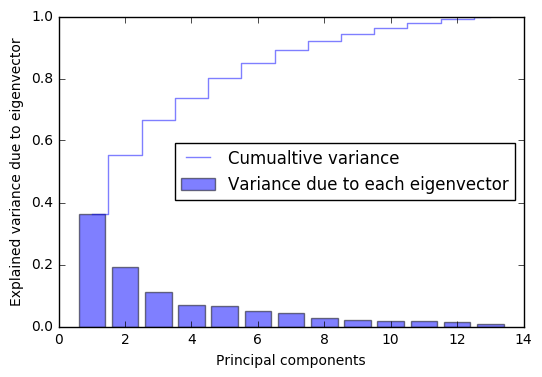

In [21]:
plt.bar(range(1,14),var,alpha=0.5,align='center',label='Variance due to each eigenvector')
plt.step(range(1,14),cumvar,alpha=0.5,where='mid',label='Cumualtive variance')
plt.ylabel('Explained variance due to eigenvector')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

+ Each bar represents the variance captured by the pricipal component
+ First Principal Component captures 0.4 or 40% of the total variance
+ First two Principal Components captures 0.6 or 60% of the total variance present among features

**This variance plot helps us to figure out how many principal components should be selected for our analysis**

Since the first two PC captures 60% of the total variance, let's explore whether they can help us to identify a decision boundary

In [29]:
#This function plots the class labels on the plan contaning two Principal components as the X and Y axis
def plotting(X,y):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    for idx,c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1,0],y=X[y==c1,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=c1)

In [30]:
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(X_scaled)

In [31]:
plotting(X_scaled,y)

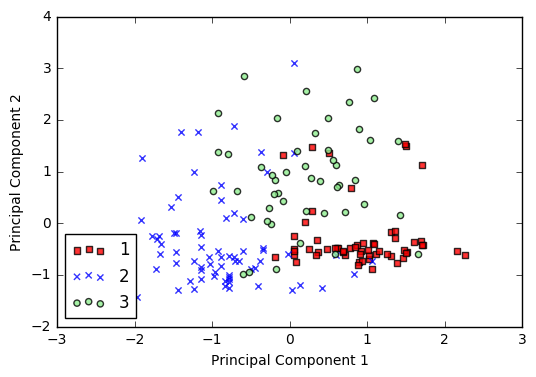

In [32]:
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower left')
plt.show()

**We can easily picture a decision boundary which helps us seperate these 3 classes, just using 2 features (Principal Components) from our dataset**

### From-scratch Implementation

In order to implement PCA without using a pre-built PCA module, we can follow these steps:
+ Standardize the d-dimensional dataset using scikit-learn standardize function
+ Construct the covariance matrix using $numpy.covar()$ function
+ Decompose the covariance matrix into eigenvectors and eigenvalues using $numpy.linalg.eig()$
+ Select the top k eigenvectors
+ Construct a projection matrix $W$ using the top k eigenvectors
+ Project our d-dimensional dataset on a new subspace using projection matrix $W$


### References:

+ Python Machine Learning by Sebastian Raschka
+ Wikipedia [Principal Component Analysis]("https://en.wikipedia.org/wiki/Principal_component_analysis") 
+ [Minitab]("http://support.minitab.com/en-us/minitab/17/topic-library/modeling-statistics/multivariate/principal-components-and-factor-analysis/what-is-pca/")

### Contact:

_ If you have any suggestions or feedback, feel free to reach out to me on abhinav[dot]gpt3[at]gmail[com] _